In [1]:
import numpy as np
import matplotlib.pyplot as plt

###### Here we define the functions we need to create a neural network
###### Our sigmoid function \(\sigma \) has the derivative of \(\sigma \) * (1 - \(\sigma \))

In [2]:
# sigmoid function for converting values to bernoulli
def sigmoid(pred_val):
    return 1 / (1 + np.exp(-pred_val))

In [3]:
# derivative of sigmoid
def sigmoid_derivative(pred_val):
    return np.multiply(sigmoid(pred_val), (1 - sigmoid(pred_val)))

###### Forward propogation converts the input to the output, creating a "black box" of the hidden node layers

In [4]:
# forward propogates, storing the value of each node layer in a returned list
def forward_prop(inputs, thetas, sample_size):
    outputs = []
    for theta in thetas:
        # adds ones to the beginning of each layer to account for the weight/intercept theta value
        inputs = np.hstack((np.ones((sample_size, 1)), np.asarray(inputs)))
        # the dot product will get the values of the next layer, we store this value to be used in backpropogation
        inputs = inputs @ theta.T
        outputs.append(inputs)
        # the sigmoid function is called in every layer
        inputs = sigmoid(inputs)
    return outputs

###### Back propogation gets the gradient for each set of weights, since multiple thetas are used
###### This is basically an application of the "chain rule" in Calculus

###### Additionally, when the number of classifications is greater than 2, a matrix must be generated with 0's and 1's, just like one vs all logistic regression

In [5]:
def back_prop(outputs, actual_val, inputs, thetas, m, num_classifications):
    # checks for the number of classifications to adjust the y matrix appropriately
    if (num_classifications != 2):
        actual_val = (np.eye(num_classifications))[actual_val]
    # calculates the differences
    diff3 = sigmoid(outputs[-1]) - actual_val
    diff2 = np.multiply(diff3 @ thetas[1][:, 1:], sigmoid_derivative(outputs[0]))
    # converts to partial derivatives / gradients
    Delta1 = diff2.T @ np.hstack((np.ones((m, 1)), np.asarray(inputs)))
    Delta2 = diff3.T @ np.hstack((np.ones((m, 1)), np.asarray(sigmoid(outputs[0]))))
    # divides by the appropriate constant
    return [Delta1 / m, Delta2 / m]

###### Below is a representation of the neural network architecture we will be using for this first example

<h3 align="center">
    <u>Neural Net Architecture with xnor</u> (or == operator)
</h3>
<br>
<img src="xnor_NN.png">

In [6]:
# defining inputs and outputs
xnor_inputs = np.matrix("0 0; 1 0; 0 1; 1 1")
xnor_outputs = np.matrix("1; 0; 0; 1")

###### Each theta value is represented by the black lines
###### The dimension of each theta vector is as follows: <br>

###### Let a<sub>i</sub> be the layer of neurons in the ith layer, such that a<sub>0</sub> is the input layer, a<sub>1</sub> is the hidden layer, and a<sub>2</sub> is the output layer
###### The dimension of the theta matrix connecting a<sub>i</sub> to a<sub>i+1</sub> is (m x n), where m is the number of neurons in a<sub>i+1</sub>, and n is the number of neurons in a<sub>i</sub> + 1

In [7]:
# defining theta values with correct dimensions
theta_one = np.matrix(np.random.random((2, 3)))
theta_two = np.matrix(np.random.random((1, 3)))
xnor_thetas = [theta_one, theta_two]

###### Our learning rate is especially high in this case because we have a very small sample size (only 4 possible combinations)
###### We need our cost gradients to converge quickly
###### Therefore in this case, our algorithm can give very innacurate results depending on the choice of thetas

In [8]:
# defining constants
sample_size = xnor_outputs.size
num_classifications = 2
learning_rate = 5
num_iterations = 10000

In [9]:
# gradient descent
for iteration in range(num_iterations):
    outputs = forward_prop(xnor_inputs, xnor_thetas, sample_size)
    gradients = back_prop(outputs, xnor_outputs, xnor_inputs, xnor_thetas, sample_size, num_classifications)
    xnor_thetas[0] = xnor_thetas[0] - learning_rate * gradients[0]
    xnor_thetas[1] = xnor_thetas[1] - learning_rate * gradients[1]

In [10]:
print("Inputs:")
print(str(xnor_inputs))
print()
print("Outputs (rounded):")
print(str(np.round(sigmoid(outputs[-1]), 3)))

Inputs:
[[0 0]
 [1 0]
 [0 1]
 [1 1]]

Outputs (rounded):
[[1.]
 [0.]
 [0.]
 [1.]]


<h4>
    <u>Utilizing Neural Networks in MNIST Data Set (recognizing handwritten digits)</u>
</h4>

<h3 align="center">
    <u>Neural Net Architecture for MNIST</u>
</h3>
<br>
<img src="mnist_nn.png">

###### We will be importing the mnist data from keras, which is forunately almost properly formatted

In [11]:
# importing the appropriate libraries
import keras
from keras.datasets import mnist

Using TensorFlow backend.


In [12]:
# importing the data set
(mnist_x_train, mnist_y_train), (mnist_x_test, mnist_y_test) = mnist.load_data()

###### Our constants are similar to before
###### However, this a very CPU-intensive algorithm, so we were unable to experiment with a wide range of learning rates

In [13]:
# defining our constants
num_classifications = 10
m = 2500
learning_rate = 2.5
num_iterations = 100

###### Due to memory limitations, we were restricted to use 2500 out of the 60,000 provided test images
###### Therefore the data was taken from the first 2500 images (we checked that there was an approximately equal count of numbers) <br>
###### The data was also reshaped so all the pixels for the images could be represented by a single vector
###### Finally, each pixel was divided by 255 (the max pixel value), to normalize the data to floats between 0 and 1

In [14]:
# reshaping and normalizing the inputs to fit our needs
mnist_train_inputs = (mnist_x_train[0:m][:][:].reshape(m, 28*28)) / 255
mnist_train_outputs = mnist_y_train[0:m]

mnist_test_inputs = (mnist_x_test[:][:][:].reshape(mnist_x_test.shape[0], 28*28)) / 255
mnist_test_outputs = mnist_y_test

###### We defined our thetas using the same convention as above
###### We have 28 * 28 inputs (for each pixel), 25 nodes in the hidden layer, and 10 outputs (0 - 9)

###### Our thetas now also range between (-0.5 and 0.5), for proper instantiation

In [15]:
# defining theta values with correct dimensions
theta_one = np.matrix(np.random.random((25, 785))) - 0.5
theta_two = np.matrix(np.random.random((10, 26))) - 0.5
mnist_thetas = [theta_one, theta_two]

###### We then use the same gradient descent algorithm as in xnor, but swapping variables

In [16]:
# gradient descent (run this cell multiple times for improved accuracy)
for iteration in range(num_iterations):
    outputs = forward_prop(mnist_train_inputs, mnist_thetas, m)
    gradients = back_prop(outputs, mnist_train_outputs, mnist_train_inputs, mnist_thetas, m, num_classifications)
    mnist_thetas[0] = mnist_thetas[0] - learning_rate * gradients[0]
    mnist_thetas[1] = mnist_thetas[1] - learning_rate * gradients[1]

###### We can now see how many of the training images were classified correctly with our forward propogation algorithm
###### If we were able to adjust the learning rate and number of iterations, this number would be higher

In [17]:
# forward propogates to get our predicted values
predicted_train_outputs = np.argmax(sigmoid(outputs[-1]), axis = 1)
num_correct_labels = np.sum(np.diagonal(predicted_train_outputs == mnist_train_outputs))

print(str(num_correct_labels) + " out of " + str(predicted_train_outputs.size) + " images were identified correctly in training")
print("This is about " + str(round(100 * (num_correct_labels / predicted_train_outputs.size), 5)) + "%")

2298 out of 2500 images were identified correctly in training
This is about 91.92%


###### We then do the same thing for the test training data
###### Since the forward propogation algorithm is not very expensive, we are able to use all of the testing images

In [18]:
test_predictions = sigmoid((forward_prop(mnist_test_inputs, mnist_thetas, mnist_x_test.shape[0]))[-1])
predicted_test_output_labels = np.argmax(test_predictions, axis = 1)
num_correct_test_labels = np.sum(np.diagonal(predicted_test_output_labels == mnist_test_outputs))

print(str(num_correct_test_labels) + " out of " + str(predicted_test_output_labels.size) + " images were identified correctly in testing")
print("This is about " + str(round(100 * (num_correct_test_labels / predicted_test_output_labels.size),4)) + "%")

8681 out of 10000 images were identified correctly in testing
This is about 86.81%


###### We can also print the sigmoid outputs for a random image in the test outputs (run over and over to see prediction)

In [19]:
# imports the appropriate library
import PIL
from PIL import Image

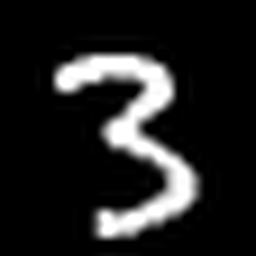

The prediction values are: [0.001 0.009 0.021 0.73  0.001 0.022 0.    0.025 0.149 0.002]
The computer predicts this number is: 3


In [29]:
# help from: https://stackoverflow.com/questions/38867869/how-to-create-image-from-numpy-float32-array
# gets the random index from the list of test outputs
random_index = round(mnist_test_outputs.size * np.random.random())

# displays and formats the image correctly
data = mnist_test_inputs[random_index].reshape(28, 28)
formatted = (data * 255 / np.max(data)).astype('uint8')
img = Image.fromarray(formatted)
display(img.resize((256,256), PIL.Image.LANCZOS))

# gets the predction values and label for that image
prediction_arr = np.round(sigmoid(forward_prop(np.matrix(mnist_test_inputs[random_index]), mnist_thetas, 1)[-1]), 3)
prediction_label = np.argmax(prediction_arr)

print("The prediction values are: " + str(prediction_arr[0]))
print("The computer predicts this number is: " + str(prediction_label))

<u></u>